1. Colab 환경 설정
Colab에 접속하여 새 노트를 생성한 후, 필요한 라이브러리를 설치합니다.

In [1]:
!pip install transformers datasets torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.5 MB/s eta 0:00:00


In [2]:
!pip install opencv-python-headless
!pip install opencv-contrib-python

In [3]:
!pip install pafy yt-dlp opencv-python numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.6/171.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.2 MB/s eta 0:00:00


In [4]:
!pip install diffusers

In [5]:
!pip install timm

2. 필요한 라이브러리 임포트

In [6]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

3. 모델 및 프로세서 로드
DETR(Detection Transformer) 모델을 사용하여 얼굴을 탐지할 수 있습니다.

In [7]:
# 모델 및 이미지 프로세서 로드
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

4. 이미지 준비
웹에서 이미지를 가져오거나 로컬 파일을 사용할 수 있습니다.

In [ ]:
# 이미지 URL 설정
url = "https://example.com/image.jpg"  # 여기서 실제 이미지 URL로 변경하세요
image = Image.open(requests.get(url, stream=True).raw)


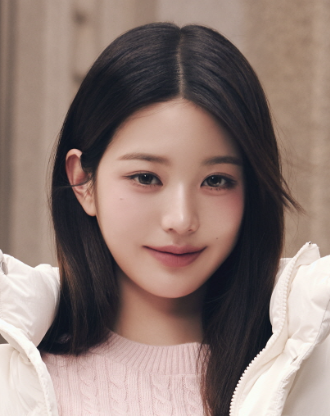

In [11]:
# image = cv2.imread('sample.png')
image = Image.open('sample.png')
image

In [13]:
print(type(image))

<class 'PIL.PngImagePlugin.PngImageFile'>


5. 이미지 처리 및 얼굴 탐지

In [14]:
# 이미지 전처리
inputs = processor(images=image, return_tensors="pt")

# 모델 예측
with torch.no_grad():
    outputs = model(**inputs)

# 탐지된 객체의 bbox와 label을 가져옵니다.
# DETR의 출력에서 필요한 정보 추출
target_sizes = torch.tensor([image.size[::-1]])  # (높이, 너비)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# 탐지된 얼굴에 대한 bbox 출력
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if label == 1:  # label 1은 사람을 나타냅니다.
        box = [round(i, 2) for i in box.tolist()]
        print(f"Detected face with confidence {score.item():.2f}: {box}")


Detected face with confidence 1.00: [-0.09, 19.76, 329.91, 416.02]


6. 결과 시각화 (선택 사항)

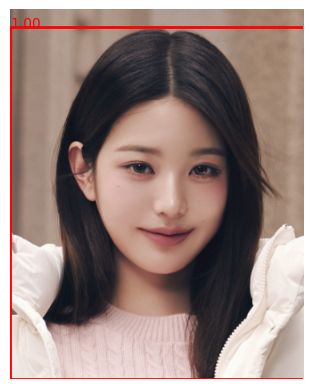

In [15]:
import matplotlib.pyplot as plt

# 이미지와 탐지 결과 시각화
plt.imshow(image)
ax = plt.gca()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if label == 1:  # label 1은 사람을 나타냅니다.
        box = [round(i, 2) for i in box.tolist()]
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                     fill=False, color="red", linewidth=2))
        ax.text(box[0], box[1], f'{score.item():.2f}', color='red')

plt.axis('off')
plt.show()
